In [21]:
import sys
import importlib
sys.path.append('..')
import rdd
import scanpy as sc

# Quick start
just read Seurat rds as adata

In [2]:
adata = rdd.seurat2adata("/nfs/cellgeni/pasham/code/rds-py/rds/seurat.rds")
adata

[2025-12-17 16:17:04,072][INFO] Reading /nfs/cellgeni/pasham/code/rds-py/rds/seurat.rds
[2025-12-17 16:17:06,660][INFO] Done reading /nfs/cellgeni/pasham/code/rds-py/rds/seurat.rds


AnnData object with n_obs × n_vars = 972 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'

# A bit of customization
read file, check what is inside and select what to load

In [38]:
robj = rdd.parse_rds("/nfs/cellgeni/pasham/code/rds-py/rds/visium2.rds")
robj.show()

[2025-12-17 16:39:05,965][INFO] Reading /nfs/cellgeni/pasham/code/rds-py/rds/visium2.rds
[2025-12-17 16:40:41,167][INFO] Done reading /nfs/cellgeni/pasham/code/rds-py/rds/visium2.rds


Robj(Seurat): 
&assays(VECSXP): 
&meta.data(data.frame): 
&active.assay(STRSXP): [Spatial]
&active.ident(factor): [1,1,1,...]
&graphs(VECSXP): []
&neighbors(VECSXP): []
&reductions(VECSXP): 
&images(VECSXP): 
&project.name(STRSXP): [SeuratProject]
&misc(VECSXP): []
&version(package_version,numeric_version): 
&commands(VECSXP): 
&tools(VECSXP): []
&class(STRSXP): [Seurat]



by default seurat2adata takes first assay and 'counts' layer (slot), lets see whether we have anything else here:

In [7]:
# lets look on assays, we want to see slots in there, so lets change default number of levels to show
robj.get('assays').show(2)

Robj(VECSXP): 
+0(Assay): 
|&counts(dgCMatrix): 
|&data(dgCMatrix): 
|&scale.data(REALSXP): [0.0,0.0,0.0,...]
|&assay.orig(SYMSXP): [NULL]
|&var.features(STRSXP): [ENSG00000211679,ENSG00000205186,ENSG00000211892,...]
|&meta.features(data.frame): 
|&misc(VECSXP): []
|&key(STRSXP): [spatial_]
|&class(STRSXP): [Assay]
*names(STRSXP): [Spatial]



In [20]:
# so we can take norm data instead of raw counts (default)
# instead or re-reading file we can pass robj to seurat2adata
adata = rdd.seurat2adata(robj,layer='data')
adata

AnnData object with n_obs × n_vars = 3516 × 36601
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'is.tissue', 'man.ann', 'border.inx', 'dist2border.graph', 'nearest.border.pos.graph', 'slice.border.inx', 'dist2hf', 'lloyd.man.ann', 'sanger_id', 'id', 'barcode'
    obsm: 'pca', 'umap'

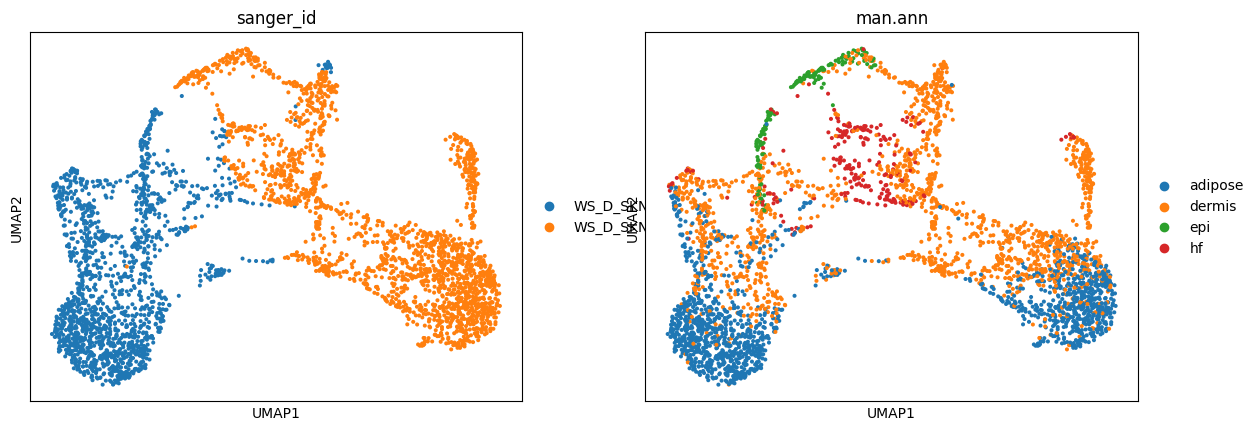

In [23]:
sc.pl.embedding(adata,basis='umap',color=['sanger_id','man.ann'])

# Read me all
lets see a bit deeper into the object and parse individual parts of it
it might be useful for other rds files

In [24]:
# there is just one assay (Spatial)
# there we have counts, data (norm counts) and even scale.data. We can access these individual slots by:
robj.get(['assays',0,'data']).show()

Robj(dgCMatrix): 
&i(INTSXP): [58,59,62,...]
&p(INTSXP): [0,870,2489,...]
&Dim(INTSXP): [36601,3516]
&Dimnames(VECSXP): 
&x(REALSXP): [2.0515127661548256,2.0515127661548256,2.0515127661548256,...]
&factors(VECSXP): []
&class(STRSXP): [dgCMatrix]



In [25]:
# we can load it as anndata (in order to keep dimnames if any)
rdd.matrix2anndata(robj.get(['assays',0,'data']))

AnnData object with n_obs × n_vars = 3516 × 36601

In [33]:
# matrix2anndata can handle dense arrays as well
rdd.matrix2anndata(robj.get(['assays',0,'scale.data']))

AnnData object with n_obs × n_vars = 3516 × 36601

In [34]:
# or if you don't need anndata, just array
rdd.array2numpy(robj.get(['assays',0,'scale.data']))

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22978798, -0.22978798, -0.22978798, ..., -0.22978798,
        -0.22978798, -0.22978798],
       [-0.07003631, -0.07003631, -0.07003631, ..., -0.07003631,
        -0.07003631, -0.07003631]], shape=(36601, 3516))

In [43]:
# or we cam read data.frame
obs = rdd.as_data_frame(robj.get('meta.data'))
obs

,orig.ident,nCount_Spatial,nFeature_Spatial,is.tissue,man.ann,border.inx,dist2border.graph,nearest.border.pos.graph,slice.border.inx,dist2hf,lloyd.man.ann,sanger_id,id,barcode
WS_D_SKNsp10276959|AAACCGTTCGTCCAGG-1,SeuratProject,1475.0,870,1.0,adipose,NaN,28.0,1.0,NaN,23.963401,,WS_D_SKNsp10276959,H.P730.1,AAACCGTTCGTCCAGG-1
WS_D_SKNsp10276959|AAACGAGACGGTTGAT-1,SeuratProject,3232.0,1619,1.0,adipose,NaN,19.0,31.0,NaN,5.365586,,WS_D_SKNsp10276959,H.P730.1,AAACGAGACGGTTGAT-1
WS_D_SKNsp10276959|AAACTCGGTTCGCAAT-1,SeuratProject,2683.0,1403,1.0,adipose,NaN,45.0,4.0,1.0,32.952385,,WS_D_SKNsp10276959,H.P730.1,AAACTCGGTTCGCAAT-1
WS_D_SKNsp10276959|AAACTCGTGATATAAG-1,SeuratProject,1312.0,876,1.0,dermis,NaN,3.0,51.0,NaN,6.624419,,WS_D_SKNsp10276959,H.P730.1,AAACTCGTGATATAAG-1
WS_D_SKNsp10276959|AAACTGCTGGCTCCAA-1,SeuratProject,3042.0,1658,1.0,adipose,NaN,27.0,11.0,NaN,15.731406,,WS_D_SKNsp10276959,H.P730.1,AAACTGCTGGCTCCAA-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WS_D_SKNsp10276960|TTGTTCAGTGTGCTAC-1,SeuratProject,578.0,419,1.0,adipose,NaN,40.0,20.0,122.0,25.452656,,WS_D_SKNsp10276960,H.P729.1,TTGTTCAGTGTGCTAC-1
WS_D_SKNsp10276960|TTGTTGTGTGTCAAGA-1,SeuratProject,691.0,457,1.0,adipose,NaN,31.0,1.0,NaN,18.577244,,WS_D_SKNsp10276960,H.P729.1,TTGTTGTGTGTCAAGA-1
WS_D_SKNsp10276960|TTGTTTCACATCCAGG-1,SeuratProject,49939.0,7419,1.0,hf,NaN,7.0,36.0,NaN,0.000000,,WS_D_SKNsp10276960,H.P729.1,TTGTTTCACATCCAGG-1
WS_D_SKNsp10276960|TTGTTTCATTAGTCTA-1,SeuratProject,51529.0,8266,1.0,hf,NaN,5.0,48.0,NaN,0.000000,,WS_D_SKNsp10276960,H.P729.1,TTGTTTCATTAGTCTA-1


In [40]:
# or lets look on images 
robj.get(['images']).show()

Robj(VECSXP): 
+0(VisiumV1): 
+1(VisiumV1): 
*names(STRSXP): [slice1,slice1.2]



In [41]:
robj.get(['images',0]).show()

Robj(VisiumV1): 
&image(REALSXP): [0.9473684210526314,0.9369189396849789,0.9369189396849789,...]
&scale.factors(scalefactors): 
&coordinates(data.frame): 
&spot.radius(REALSXP): [0.013321296841419]
&assay(STRSXP): [Spatial]
&key(STRSXP): [slice1_]
&class(STRSXP): [VisiumV1]



In [42]:
robj.get(['images',0,'image']).show() # it is 3D array, lets load it

Robj(REALSXP): [0.9473684210526314,0.9369189396849789,0.9369189396849789,...]
*dim(INTSXP): [590,600,3]



In [45]:
# it is 3D array, lets load it
img = rdd.array2numpy(robj.get(['images',0,'image']))
img

array([[[0.94736842, 0.96842105, 0.84912281],
        [0.94736842, 0.96842105, 0.84912281],
        [0.94736842, 0.96842105, 0.85614035],
        ...,
        [0.96486179, 0.97894737, 0.85921999],
        [0.96486179, 0.97894737, 0.85921999],
        [0.95781901, 0.97894737, 0.86626278]],

       [[0.93691894, 0.95789474, 0.83903189],
        [0.94391087, 0.95789474, 0.84602382],
        [0.94391087, 0.95789474, 0.84602382],
        ...,
        [0.95781901, 0.97894737, 0.86626278],
        [0.95781901, 0.97894737, 0.85921999],
        [0.95781901, 0.97894737, 0.86626278]],

       [[0.93691894, 0.95789474, 0.83903189],
        [0.94391087, 0.95789474, 0.84602382],
        [0.94391087, 0.95789474, 0.84602382],
        ...,
        [0.95781901, 0.97894737, 0.85921999],
        [0.95781901, 0.97894737, 0.85921999],
        [0.95781901, 0.97894737, 0.85921999]],

       ...,

       [[0.94391087, 0.95789474, 0.84602382],
        [0.94391087, 0.95789474, 0.84602382],
        [0.93691894, 0

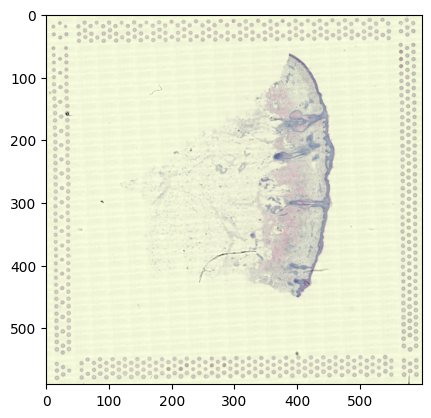

In [46]:
import matplotlib.pyplot as plt
plt.imshow(img)

# Read some random rds

In [48]:
robj = rdd.parse_rds("/nfs/cellgeni/pasham/code/rds-py/rds/env_in_list.rds")
robj.show(100)

[2025-12-17 16:49:44,062][INFO] Reading /nfs/cellgeni/pasham/code/rds-py/rds/env_in_list.rds
[2025-12-17 16:49:44,073][INFO] Done reading /nfs/cellgeni/pasham/code/rds-py/rds/env_in_list.rds


Robj(VECSXP): 
+0(REALSXP): [10.0]
+1(ENVSXP): 
|&locked:0
|&enclos(GLOBALENV): [None]
|&frame(NILSXP): [None]
|&hashtab(VECSXP): 
||+0(NILSXP): [None]
||+1(NILSXP): [None]
||+2(NILSXP): [None]
||+3(LISTSXP): 
|||&var(REALSXP): [1.0,3.0]
||+4(NILSXP): [None]
||+5(NILSXP): [None]
||+6(NILSXP): [None]
||+7(NILSXP): [None]
||+8(NILSXP): [None]
||+9(NILSXP): [None]
||+10(NILSXP): [None]
||+11(NILSXP): [None]
||+12(NILSXP): [None]
||+13(NILSXP): [None]
||+14(LISTSXP): 
|||&foo(STRSXP): [ab]
||+15(NILSXP): [None]
||+16(LISTSXP): 
|||&bar(STRSXP): [b]
||+17(NILSXP): [None]
||+18(NILSXP): [None]
||+19(NILSXP): [None]
||+20(NILSXP): [None]
||+21(NILSXP): [None]
||+22(NILSXP): [None]
||+23(NILSXP): [None]
||+24(NILSXP): [None]
||+25(NILSXP): [None]
||+26(NILSXP): [None]
||+27(NILSXP): [None]
||+28(NILSXP): [None]
|&env_attrs(NILSXP): [None]
+2(STRSXP): [aaa]
*names(STRSXP): [var,env,bar]



In [50]:
# looks lile list (VECSXP) with three elements named var,env,bar
robj.get(0).show()

Robj(REALSXP): [10.0]



In [51]:
# lets get the value
robj.get(0).value

[10.0]

In [52]:
# what is in second item?

In [54]:
# that is ENVm looks like here is some data in hashtab
robj.get(1).show(2)

Robj(ENVSXP): 
&locked:0
&enclos(GLOBALENV): [None]
&frame(NILSXP): [None]
&hashtab(VECSXP): 
|+0(NILSXP): [None]
|+1(NILSXP): [None]
|+2(NILSXP): [None]
|+3(LISTSXP): 
|+4(NILSXP): [None]
|+5(NILSXP): [None]
|+6(NILSXP): [None]
|+7(NILSXP): [None]
|+8(NILSXP): [None]
|+9(NILSXP): [None]
|+10(NILSXP): [None]
|+11(NILSXP): [None]
|+12(NILSXP): [None]
|+13(NILSXP): [None]
|+14(LISTSXP): 
|+15(NILSXP): [None]
|+16(LISTSXP): 
|+17(NILSXP): [None]
|+18(NILSXP): [None]
|+19(NILSXP): [None]
|+20(NILSXP): [None]
|+21(NILSXP): [None]
|+22(NILSXP): [None]
|+23(NILSXP): [None]
|+24(NILSXP): [None]
|+25(NILSXP): [None]
|+26(NILSXP): [None]
|+27(NILSXP): [None]
|+28(NILSXP): [None]
&env_attrs(NILSXP): [None]



In [55]:
# items 3,14 and 16 are not empty
robj.get([1,'hashtab']).show(2)

Robj(VECSXP): 
+0(NILSXP): [None]
+1(NILSXP): [None]
+2(NILSXP): [None]
+3(LISTSXP): 
|&var(REALSXP): [1.0,3.0]
+4(NILSXP): [None]
+5(NILSXP): [None]
+6(NILSXP): [None]
+7(NILSXP): [None]
+8(NILSXP): [None]
+9(NILSXP): [None]
+10(NILSXP): [None]
+11(NILSXP): [None]
+12(NILSXP): [None]
+13(NILSXP): [None]
+14(LISTSXP): 
|&foo(STRSXP): [ab]
+15(NILSXP): [None]
+16(LISTSXP): 
|&bar(STRSXP): [b]
+17(NILSXP): [None]
+18(NILSXP): [None]
+19(NILSXP): [None]
+20(NILSXP): [None]
+21(NILSXP): [None]
+22(NILSXP): [None]
+23(NILSXP): [None]
+24(NILSXP): [None]
+25(NILSXP): [None]
+26(NILSXP): [None]
+27(NILSXP): [None]
+28(NILSXP): [None]



In [57]:
robj.get([1,'hashtab',3]).show(20)

Robj(LISTSXP): 
&var(REALSXP): [1.0,3.0]



In [59]:
# lets extract the value
robj.get([1,'hashtab',3,'var']).value

[1.0, 3.0]